In [9]:
import pandas as pd
import sumolib

In [10]:
net = sumolib.net.readNet("Hornsgatan.net")

In [11]:
from shapely.geometry import LineString, Polygon

def getShape(edge):
    _shape = list()
    for point in edge.getShape():
        _shape.append(net.convertXY2LonLat(point[0], point[1]))
    return LineString(_shape)

In [12]:
edge_data = list()
for edge in net.getEdges():

        sh = edge.getRawShape()
        if sh[0]==sh[-1]:
            sh.pop()
        shape = list()
        for point in sh:
            shape.append(net.convertXY2LonLat(point[0], point[1]))
        shape = LineString(shape) 

        x1=shape.xy[0][0]
        x2=shape.xy[0][-1]
        y1=shape.xy[1][0]
        y2=shape.xy[1][-1]
        #dilated = shape.buffer(edge.getLaneNumber()*0.000001)
        edge_data.append({"_uid_":str(edge.getID()),"id":str(edge.getID()), "geometry" : shape, "name":edge.getName(), "source":edge.getFromNode().getID(), "target":edge.getToNode().getID(),
                          "laneNumber":edge.getLaneNumber(), "type":edge.getType(),"x1":x1, "y1":y1, "x2":x2, "y2":y2 })

In [13]:
edgedata = pd.DataFrame(edge_data)
edgedata.head()

,_uid_,id,geometry,name,source,target,laneNumber,type,x1,y1,x2,y2
0,-118190636,-118190636,LINESTRING (18.035167884605865 59.316105034461...,Borgargatan,1879647580,194948,1,highway.residential,18.035168,59.316105,18.034147,59.318054
1,-1285445696,-1285445696,LINESTRING (18.0397905169873 59.31827230284493...,Högalidsgatan,194952,194949,1,highway.residential,18.039791,59.318272,18.035487,59.318106
2,-1303,-1303,LINESTRING (18.03330840828727 59.3152163825475...,Hornsgatan,1647249308,21651854,1,highway.residential,18.033308,59.315216,18.031606,59.314850
3,-151884978#2,-151884978#2,LINESTRING (18.03729817648388 59.3152492647468...,Lignagatan,8080758,1647249339,1,highway.residential,18.037298,59.315249,18.037115,59.315625
4,-151884978#3,-151884978#3,LINESTRING (18.03735405977737 59.3151343477464...,Lignagatan,355140447,8080758,1,highway.residential,18.037354,59.315134,18.037298,59.315249


In [14]:
import geopandas as gpd
from pyproj import CRS

# Path to the CSV file

# Read the CSV file using pandas
gdf = gpd.GeoDataFrame(edgedata, geometry="geometry")
# Set the CRS for the GeoDataFrame
crs = CRS.from_epsg(4326)  # Example: EPSG code for WGS84 geographic CRS
gdf.crs = crs

# Path to save the shapefile
shapefile_path = 'shape/edges.shp'

# Save the data as a shapefile with the specified CRS
gdf.to_file(shapefile_path, driver='ESRI Shapefile')


# test

<Axes: >

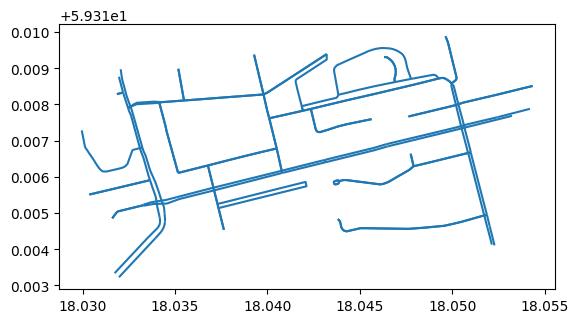

In [15]:
import geopandas as gp
gdf = gp.read_file("shape/edges.shp")
gdf.plot()

In [16]:
gdf

,_uid_,id,name,source,target,laneNumber,type,x1,y1,x2,y2,geometry
0,-118190636,-118190636,Borgargatan,1879647580,194948,1,highway.residential,18.035168,59.316105,18.034147,59.318054,"LINESTRING (18.03517 59.31611, 18.03512 59.316..."
1,-1285445696,-1285445696,Högalidsgatan,194952,194949,1,highway.residential,18.039791,59.318272,18.035487,59.318106,"LINESTRING (18.03979 59.31827, 18.03949 59.318..."
2,-1303,-1303,Hornsgatan,1647249308,21651854,1,highway.residential,18.033308,59.315216,18.031606,59.314850,"LINESTRING (18.03331 59.31522, 18.03196 59.315..."
3,-151884978#2,-151884978#2,Lignagatan,8080758,1647249339,1,highway.residential,18.037298,59.315249,18.037115,59.315625,"LINESTRING (18.03730 59.31525, 18.03718 59.315..."
4,-151884978#3,-151884978#3,Lignagatan,355140447,8080758,1,highway.residential,18.037354,59.315134,18.037298,59.315249,"LINESTRING (18.03735 59.31513, 18.03730 59.31525)"
...,...,...,...,...,...,...,...,...,...,...,...,...
145,896280583,896280583,Högalidsgatan,5221779843,5172054123,1,highway.tertiary,18.032087,59.318312,18.032191,59.318326,"LINESTRING (18.03209 59.31831, 18.03219 59.31833)"
146,896280584#0,896280584#0,Högalidsgatan,5172063800,5221779843,1,highway.living_street,18.031858,59.318281,18.032087,59.318312,"LINESTRING (18.03186 59.31828, 18.03192 59.318..."
147,936743676,936743676,None,1647249380,1647249378,1,highway.secondary_link,18.043092,59.316463,18.043126,59.316398,"LINESTRING (18.04309 59.31646, 18.04313 59.31640)"
148,93771259#1,93771259#1,Krukmakargatan,5537729,1639252558,1,highway.residential,18.050860,59.316655,18.051002,59.316671,"LINESTRING (18.05086 59.31666, 18.05100 59.31667)"
